In [3]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline 

In [23]:
df = pd.read_csv('data/iris.csv')
features = df.drop('variety', axis=1).values
targets = [0 if v=='Setosa' else (1 if v=='Virginica' else 2) for v in df['variety']]
x_train,x_test,y_train,y_test = train_test_split(features, targets, test_size=0.2)

x_train = torch.Tensor(x_train)
x_test = torch.Tensor(x_test)
y_train = torch.LongTensor(y_train).reshape(-1)
y_test = torch.LongTensor(y_test).reshape(-1)

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
fig.tight_layout()

plots = [(0, 1), (2, 3), (0, 2), (1, 3)]
colors = ['b', 'r', 'g']
labels = ['Setosa', 'Virginica', 'Versicolor']

for i, ax in enumerate(axes.flat):
    for k in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['variety']==labels[k]][x], df[df['variety']==labels[k]][y], color=colors[k], label=labels[k])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [8]:
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        # Input Layer (4 featrues) --> h1 N --> h2 N --> output (3 classses)
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [33]:
torch.manual_seed(32)
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

epochs = 100
losses = []

for i in range(epochs):
    y_pred = model.forward(x_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach())

    if i%10==0:
        print(f'Epoch {i} and loss is: {loss}')
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch 0 and loss is: 1.1416981220245361
Epoch 10 and loss is: 0.8959753513336182
Epoch 20 and loss is: 0.6973893046379089
Epoch 30 and loss is: 0.5407655835151672
Epoch 40 and loss is: 0.43244442343711853
Epoch 50 and loss is: 0.35116344690322876
Epoch 60 and loss is: 0.2581036686897278
Epoch 70 and loss is: 0.1701822429895401
Epoch 80 and loss is: 0.11355739086866379
Epoch 90 and loss is: 0.08833510428667068


Text(0.5, 0, 'EPOCH')

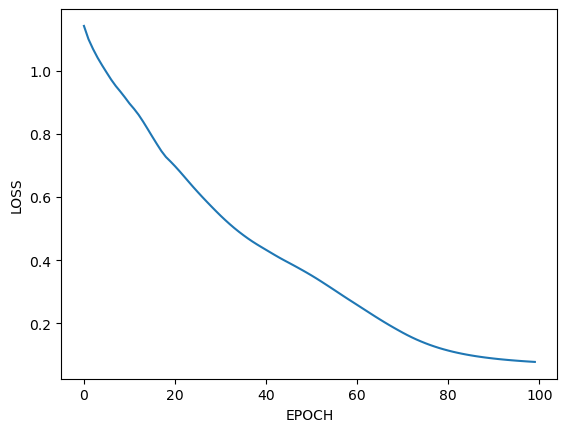

In [34]:
plt.plot(range(epochs), losses)
plt.ylabel('LOSS')
plt.xlabel('EPOCH')